# simplethermodynamics.functions

A demonstration of the functions implemented in the `simplethermodynamics.functions` submodule.

In [1]:
# depending on whether the package is installed or not

try:
    import simplethermodynamics.functions as tf
except:
    import sys
    sys.path.append('..')
    import simplethermodynamics.functions as tf

In [2]:
import sympy
from sympy.plotting import plot
import matplotlib.pyplot as plt
import numpy as np

In [3]:
T = sympy.Symbol('T')

## Functions: introduction

Most of the functions are capable of returning either numeric values (if the temperature values are passed as the argument) or a symbolic representation. Temperature is the first optional argument, which is, in most cases, the last argument in the functions.

For example, for the Einstein heat capacity function:

In [4]:
tf.cv_einstein(5, 250) # returns a symbolic SymPy expression

7794808.704375*exp(250/T)/(T**2*(exp(250/T) - 1)**2)

In [5]:
tf.cv_einstein(5, 250, 298.15) # returns one value at T = 298.15

117.65956688326843

In [6]:
tf.cv_einstein(5, 250, np.linspace(298.15, 398.15, 5)) # most of the functions can work with numpy arrays

array([117.65956688, 118.67839133, 119.49323612, 120.15474079,
       120.69885818])

Don't forget about `help`! Each function is documented. In many cases, there's also some information on where the function came from.

In [7]:
help(tf.cv_einstein)

Help on function cv_einstein in module simplethermodynamics.functions:

cv_einstein(alpha, theta, T=T)
    Heat capacity; Einstein function; J/mol/K
    
    3 * alpha * R * x**2 * exp(x) / (exp(x) - 1)**2,
    where x = theta / T
    
    Args:
        alpha: "number of oscillators per formula unit" / dimensionless
        theta: Einstein temperature / K
        T: temperature / K (if numeric value required)
    
    Returns:
        SymPy expression if T is of Symbol type or is not given explicitly.
        Value(s) if T is a number or a numpy array.



Let's set up a primitive test function that will allow us to demonstrate the functionality of `simplethermodynamics.functions`. In this `test_function`, `args` will be passed directly to our various `f` functions either without or along with the temperature values. The `test_function` will attempt to calculate several values of `f` at different temperatures and then plot the symbolic function (if possible) or the numerically calculated values.

In [8]:
def test_function(f, args, table_range = (100, 800), plot_range = (1, 800)):
    
    table_step = 100
    temps = np.arange(table_range[0], 
                      table_range[1] + table_step, 
                      table_step, 
                      dtype=float)
    # with np.arange, dtype is important so as to avoid getting integer temperatures
    # resulting in peculiar numpy errors, 
    # such as "Integers to the negative power are not allowed"
    
    # calculating
    try:
        vals = f(*args, temps)
        print('T / K\tf(T)')
        for t, v in zip(temps, vals):
            print(f'{t}\t{v:.3f}')
    except:# Exception as E:
        #print(E)
        print("This function doesn't process numpy arrays")
        print('T / K\tf(T)')
        for t in temps:
            v = f(*args, float(t))
            print(f'{t}\t{v:.3f}')
            
    # plotting
    try:
        plot(f(*args), (T, *plot_range))
    except:
        print("\nThis function's symbolic representation doesn't support plotting with sympy")
        xvals = np.linspace(*plot_range, 100)
        yvals = f(*args, xvals)
        plt.clf()
        fig, ax = plt.subplots()
        ax.plot(xvals, yvals)
        plt.show()

And now everything's ready for the demonstration.

The cells should be run sequentially, one after the other, because in some cases the polynomial coefficients defined in one cell are reused in the subsequent cells.

**Warning**: $C_v$ and $C_p$ are assumed to be interchangeable in this file and in the `simplethermodynamics.functions` submodule. This is thermodynamically incorrect, but so long as these functions are intended to be used for *approximation* of the (isobaric, in most cases) heat capacity, and not for developing the fundamentals of thermodynamics, consider it an intentional error made for the sake of convenience.

**Units**: **J/mol/K** for heat capacity and entropy, **J/mol** for enthalpy and Gibbs energy.

The math equations presented in this file show how the respective functions *can* be calculated, but they do not always correspond exactly to how the calculations are written in the code. For example, to yield simpler symbolic expressions, all polynomials are expanded.

## Einstein and Debye functions

### `cv_einstein`

can also be called as `cp_einstein`

$$C_v = \frac{3R\alpha x^2 e^x}{\left(e^x-1\right)^2}, x=\frac{\Theta}{T}$$

### `s_einstein`

$$S(T) - S(0) = 3R\alpha \left[ \frac{x}{e^x-1} - \ln{(1-e^{-x})} \right], x=\frac{\Theta}{T}$$

### `u_einstein`

can also be called as `h_einstein`

$$U(T) - U(0) = \frac{3R\alpha \theta}{e^x-1}, x=\frac{\Theta}{T}$$

T / K	f(T)
100.0	37.136
200.0	62.247
300.0	68.894
400.0	71.419
500.0	72.625
600.0	73.290
700.0	73.695
800.0	73.959


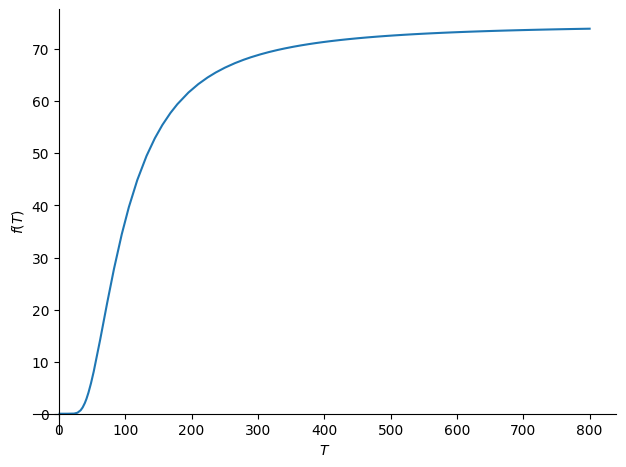

In [9]:
test_function(tf.cv_einstein, (3, 300))

T / K	f(T)
100.0	15.584
200.0	51.132
300.0	77.872
400.0	98.087
500.0	114.168
600.0	127.473
700.0	138.804
800.0	148.663


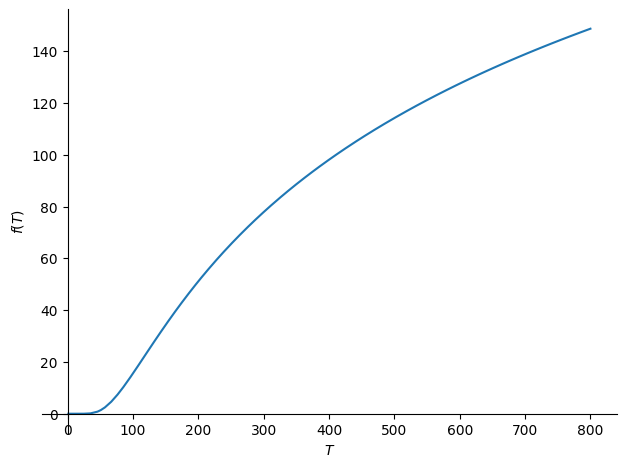

In [10]:
test_function(tf.s_einstein, (3, 300))

T / K	f(T)
100.0	1176.234
200.0	6447.747
300.0	13064.824
400.0	20097.626
500.0	27306.332
600.0	34605.076
700.0	41955.898
800.0	49339.500


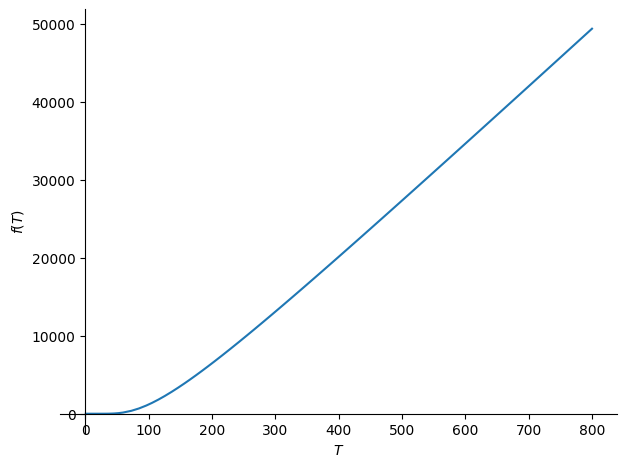

In [11]:
test_function(tf.u_einstein, (3, 300))

### `cv_einstein_mod`

can also be called as `cp_einstein_mod`

$$C_p = \frac{1}{1-\beta T} \cdot \frac{3R\alpha x^2 e^x}{\left(e^x-1\right)^2}, x=\frac{\Theta}{T}$$

T / K	f(T)
100.0	37.701
200.0	64.173
300.0	72.140
400.0	75.978
500.0	78.514
600.0	80.539
700.0	82.341
800.0	84.045


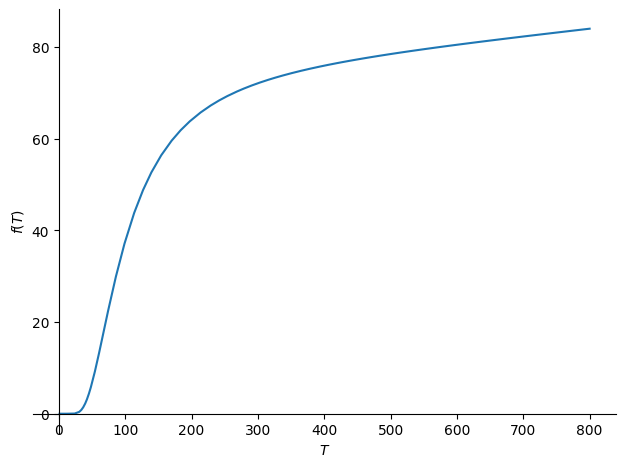

In [12]:
test_function(tf.cv_einstein_mod, (3, 300, 1.5e-4))

### `cv_debye`

can also be called as `cp_debye`

$$C_v = 9 R \alpha \left( \frac{T}{\Theta} \right)^3 \int_0^{\frac{\Theta}{T}} {\frac{x^4 e^{-x}}{\left(1-e^{-x}\right)^2}} dx$$

$$x = \frac{h\nu}{k_BT}, \nu_D = \nu_{\mathrm{max}}, \Theta = \frac{h\nu_D}{k_B}$$

T / K	f(T)
100.0	49.594
200.0	67.044
300.0	71.218
400.0	72.767
500.0	73.500
600.0	73.903
700.0	74.147
800.0	74.307

This function's symbolic representation doesn't support plotting with sympy


<Figure size 640x480 with 0 Axes>

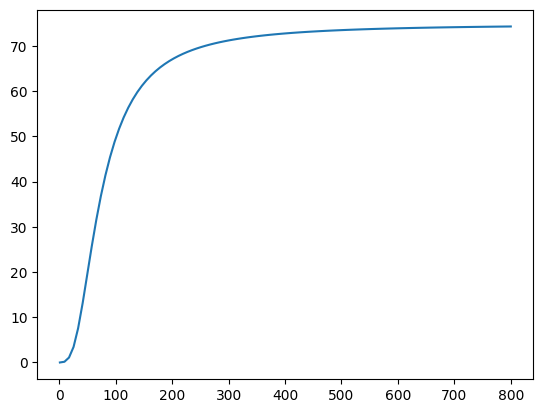

In [13]:
test_function(tf.cv_debye, (3, 300))

## Gurvich - Glushko functions

### `phi_gurvich`

$$\Phi (T) = -\frac{G(T) - H(T)}{T} = S(T) - \frac{H(T) - H(0)}{T}$$

$$\Phi (T) = A_0 + A_{ln} \ln x + A_{-2} x^{-2} + A_{-1} x^{-1} + A_1 x + A_2 x^{2} + A_3 x^{3}, x = 10^{-4} T$$

### `cp_gurvich`

$$C_p(T) = A_{ln} + 2A_{-2}x^{-2} + 2A_1x + 6A_2x^2 + 12A_3x^3, x = 10^{-4} T$$

### `s_gurvich`

$$S(T) = A0 + A_{ln}(\ln{x} + 1) - A_{-2}x^{-2} + 2A_1x + 3A_2x^2 + 4A_3x^3, x = 10^{-4} T$$

### `dh0_gurvich`

$$\left( H_T - H_{0 \ \mathrm{K}} \right) = 
10^4 \left( A_{ln}x - 2A_{-2}x^{-1} - A_{-1} + A_1x^2 + 2A_2x^3 + 3A_3x^4 \right), x = 10^{-4} T$$

### `h_gurvich`

$$H(T) = \Delta_f H_{298 \ \mathrm{K}} + \left( H_T - H_{0 \ \mathrm{K}} \right) - \left( H_{298 \ \mathrm{K}} - H_{0 \ \mathrm{K}} \right),$$

where the increments in brackets are calculated with `dh0_gurvich`

### `g_gurvich`

$$G(T) = H(T) - TS(T)$$

Thermodynamics in this example is for solid [Co3O4](http://www.chem.msu.su/rus/tsiv/Co/ivtan0006.html); this function should be valid between 298.15 K and 870 K.

T / K	f(T)
300.0	48.869
400.0	69.116
500.0	88.435
600.0	106.453
700.0	123.201
800.0	138.846


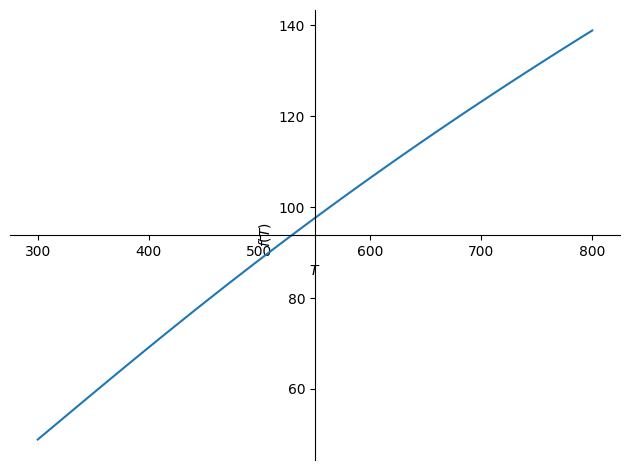

In [14]:
coeffs = (643.640627151, 207.9580, -0.02383, 5.44728833534, -772.135, 2789.68333333, 0)
test_function(tf.phi_gurvich, coeffs, table_range = (300, 800), plot_range = (300, 800))

T / K	f(T)
300.0	123.739
400.0	143.181
500.0	153.526
600.0	162.320
700.0	172.149
800.0	184.093


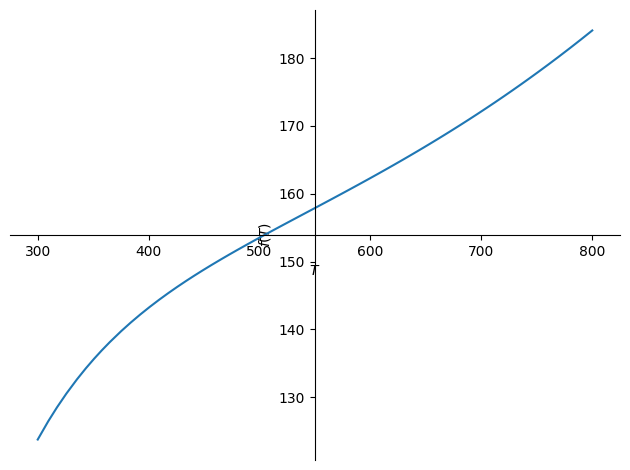

In [15]:
test_function(tf.cp_gurvich, coeffs, table_range = (300, 800), plot_range = (300, 800))

T / K	f(T)
300.0	110.064
400.0	148.721
500.0	181.853
600.0	210.619
700.0	236.357
800.0	260.097


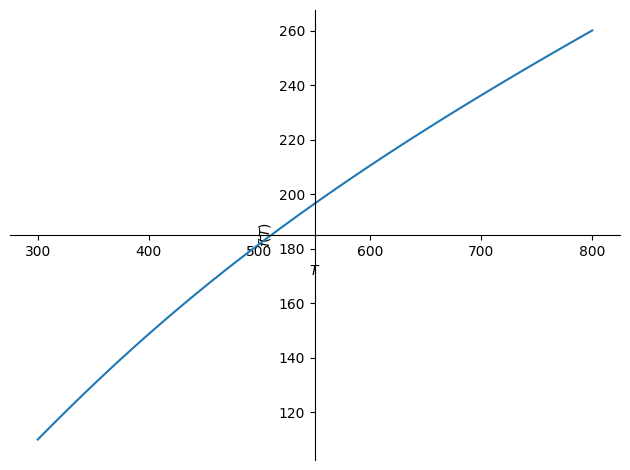

In [16]:
test_function(tf.s_gurvich, coeffs, table_range = (300, 800), plot_range = (300, 800))

T / K	f(T)
300.0	18358.397
400.0	31841.951
500.0	46708.950
600.0	62499.822
700.0	79208.901
800.0	97000.734


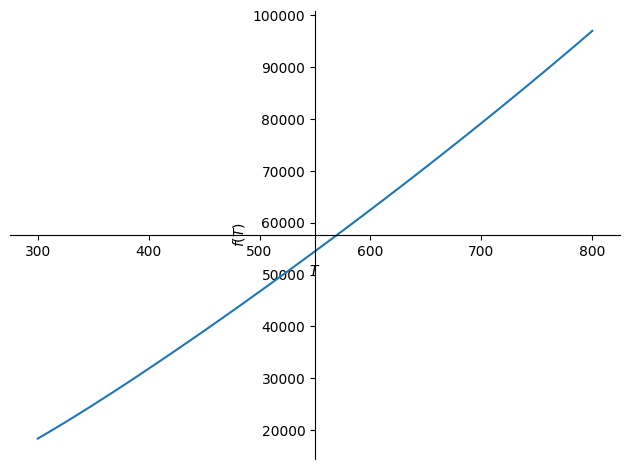

In [17]:
test_function(tf.dh0_gurvich, coeffs, table_range = (300, 800), plot_range = (300, 800))

T / K	f(T)
300.0	-914771.599
400.0	-901288.045
500.0	-886421.046
600.0	-870630.174
700.0	-853921.095
800.0	-836129.262


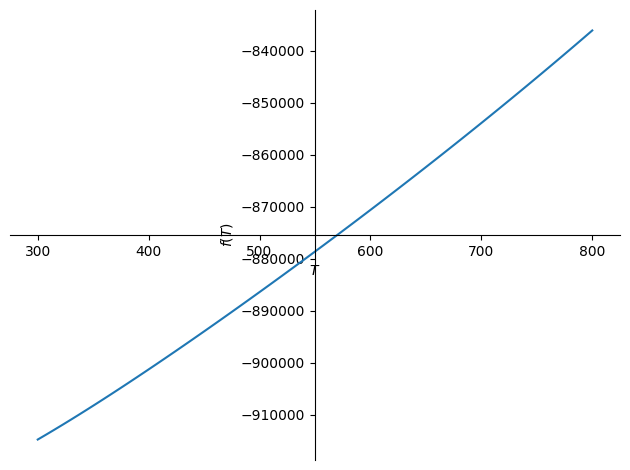

In [18]:
# appending the enthalpy of formation
coeffs = (*coeffs, -915000)
test_function(tf.h_gurvich, coeffs, table_range = (300, 800), plot_range = (300, 800))

T / K	f(T)
300.0	-947790.703
400.0	-960776.476
500.0	-977347.676
600.0	-997001.685
700.0	-1019370.952
800.0	-1044206.788


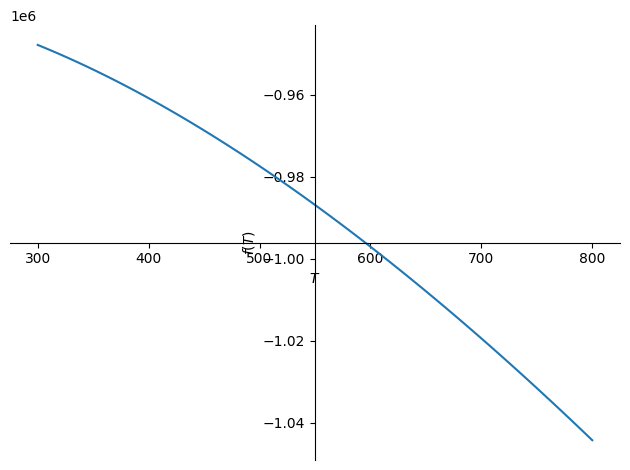

In [19]:
test_function(tf.g_gurvich, coeffs, table_range = (300, 800), plot_range = (300, 800))

## Shomate and Maier–Kelley-like polynomials

### `cp_shomate`

$$C_p° = A + Bt + Ct^2 + Dt^3 + \frac{E}{t^2}, t = \frac{T}{1000}$$

### `dh298_shomate`

$$H° − H_{298.15}°= 1000 \left( At + B\frac{t^2}{2} + C\frac{t^3}{3} + D\frac{t^4}{4} − \frac{E}{t} + F − H \right), t = \frac{T}{1000}$$

### `s_shomate`

$$S° = A\ln (t) + Bt + C\frac{t^2}{2} + D\frac{t^3}{3} − \frac{E}{2t^2} + G, t = \frac{T}{1000}$$

### `g_shomate`

$$G° = \Delta_f H_{298.15} + 1000 \left( -\frac{D}{12}t^4-\frac{C}{6}t^3-\frac{B}{2}t^2+\left(-A\ln{t}+A-G\right)t+F-H-\frac{E}{2t} \right), t = \frac{T}{1000}$$

Thermodynamics in this example is also for solid [Co3O4](https://webbook.nist.gov/cgi/cbook.cgi?ID=C1308061&Units=SI&Mask=2#Thermo-Condensed); this function should be valid between 298.15 K and 1500 K.

T / K	f(T)
300.0	123.650
400.0	141.732
500.0	153.255
600.0	163.442
700.0	173.888
800.0	185.089


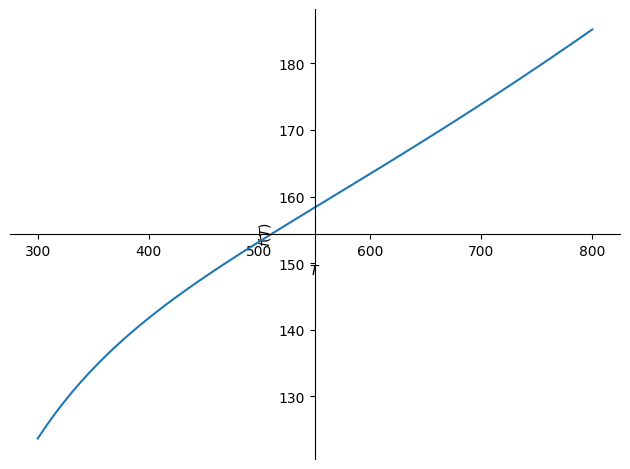

In [20]:
coeffs = (177.0953, -100.4361, 185.7792, -49.04861, -3.483951, -971.5415, 331.2828, -910.0200)
test_function(tf.cp_shomate, coeffs, table_range = (300, 800), plot_range = (300, 800))

T / K	f(T)
300.0	273.325
400.0	13640.988
500.0	28413.955
600.0	44250.694
700.0	61112.051
800.0	79053.866


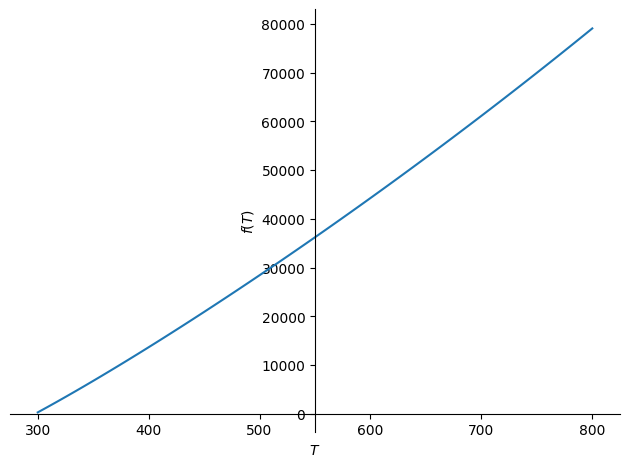

In [21]:
test_function(tf.dh298_shomate, coeffs, table_range = (300, 800), plot_range = (300, 800))

T / K	f(T)
300.0	115.208
400.0	153.541
500.0	186.458
600.0	215.304
700.0	241.275
800.0	265.216


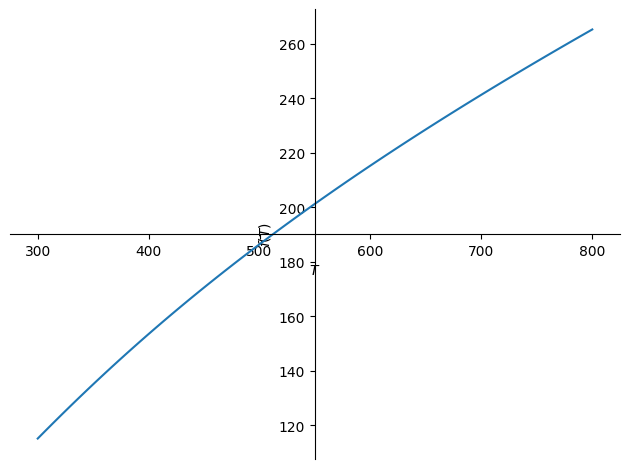

In [22]:
test_function(tf.s_shomate, coeffs, table_range = (300, 800), plot_range = (300, 800))

T / K	f(T)
300.0	-944309.062
400.0	-957795.368
500.0	-974835.171
600.0	-994951.645
700.0	-1017800.546
800.0	-1043139.305


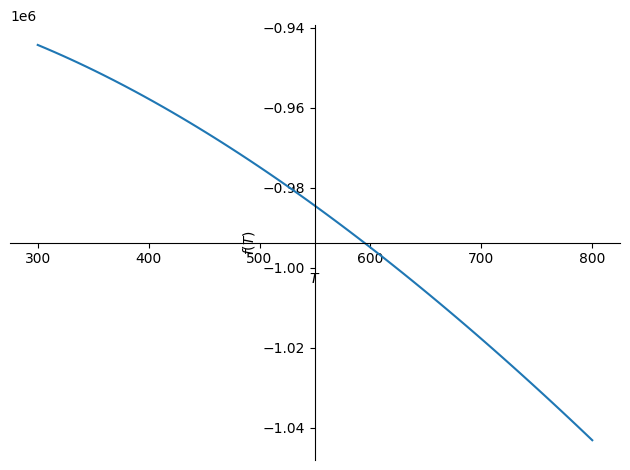

In [23]:
# appending the enthalpy of formation
coeffs = (*coeffs, -910020)
test_function(tf.g_shomate, coeffs, table_range = (300, 800), plot_range = (300, 800))

### `cp_robie`

$$C_p = A_1 + A_2T + A_3T^{-2} + A_4T^{-0.5} + A_5T^2$$

Thermodynamics in this example is also for solid Co3O4 (see p. 47 in Robie, Hemingway); this function should be valid between 298.15 K and 1000 K.

T / K	f(T)
300.0	123.850
400.0	142.508
500.0	154.690
600.0	164.323
700.0	172.753
800.0	180.541


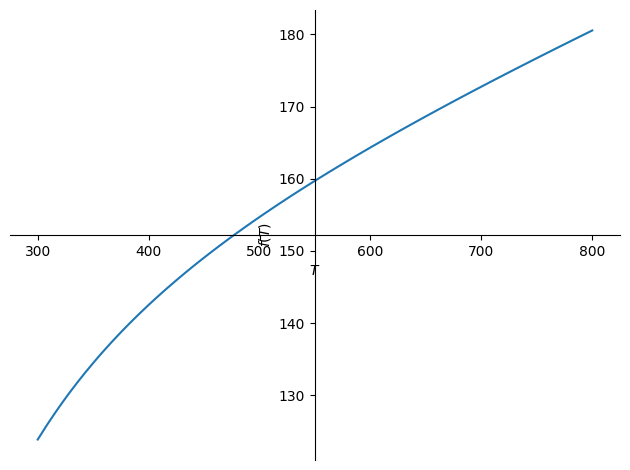

In [24]:
coeffs = (1.316e2, 6.602e-2, -2.48e6, 0, 0)
test_function(tf.cp_robie, coeffs, table_range = (300, 800), plot_range = (300, 800))

### `cp_barin`

$$C_p = 4.184 \left( A + 10^{-3}BT + 10^5CT^{-2} + 10^{-6}DT^2 \right)$$

In some cases the last term in the brackets is substituted by $10^8DT^{-3}$, which should be indicated at the bottom of the respective table in the textbook.

Thermodynamics in this example is for solid Er (see p. 239 in Barin, Knacke, Kubaschewski); this function should be valid between 298.15 K and 2500 K.

T / K	f(T)
300.0	28.090
400.0	28.382
500.0	28.740
600.0	29.193
700.0	29.750
800.0	30.418


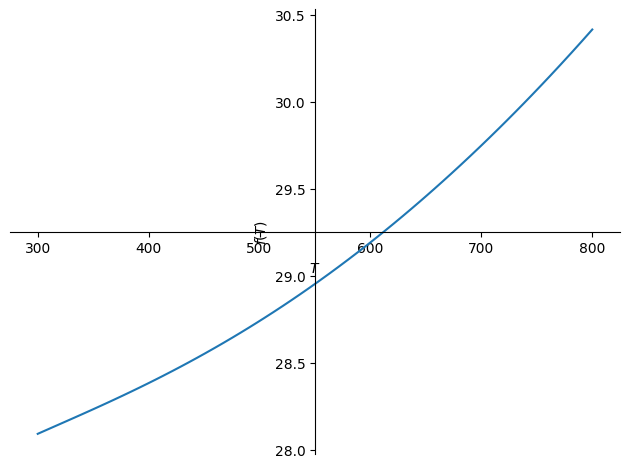

In [25]:
coeffs = (6.784, -0.478, -0.045, 1.368)
test_function(tf.cp_barin, coeffs, table_range = (300, 800), plot_range = (300, 800))

### `dh298_mks`

$$ \begin{cases}
\Delta_{298.15}^T H = H(T) - H(298.15) = aT + bT^2 + \frac c T + d\\
a = C_p(298.15) - 596.3 b + \frac c {{298.15}^2}\\
d = -298.15a - {298.15}^2 b - \frac c {298.15}
\end{cases} $$ 

The second condition follows from the definition of $C_p(298.15)$, and the third - from the condition that  $H(298.15) - H(298.15) = 0$. The resulting expression for $\Delta_{298.15}^T H$ depends only on $C_p(298.15)$, $b$, and $c$.

Thermodynamics in this example is for solid tetragonal [SrFeO3−δ](https://doi.org/10.1557/jmr.2019.143); this function should be valid between 298.15 K and 523 K.

T / K	f(T)
300.0	197.114
400.0	11282.825
500.0	23214.653


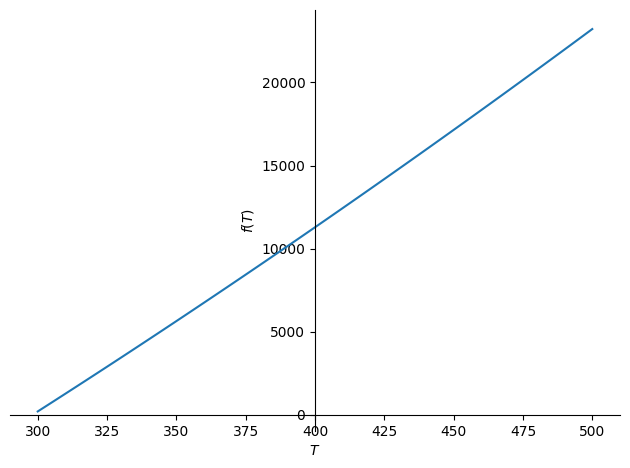

In [26]:
coeffs = (106.47, 4.23058e-2, 0)
test_function(tf.dh298_mks, coeffs, table_range = (300, 500), plot_range = (300, 500))

## NASA 7 and NASA 9 polynomials

### `cp_nasa7`

$$C_p = R \left( a_1 + a_2T + a_3T^2 + a_4T^3 + a_5T^4 \right)$$

### `h_nasa7`

$$H = R T \left( a_1 + \frac{a_2}{2} T + \frac{a_3}{3} T^2 + \frac{a_4}{4} T^3 + \frac{a_5}{5} T^4 + \frac{a_6}{T} \right)$$

### `s_nasa7`

$$S = R \left( a_1 \ln{T} + a_2 T + \frac{a_3}{2} T^2 + \frac{a_4}{3} T^3 + \frac{a_5}{4} T^4 + a_7 \right)$$

### `g_nasa7`

$$G = R T \left( a_1\left( 1 - \ln{T} \right) - \frac{a_2}{2}T - \frac{a_3}{6}T^2 - \frac{a_4}{12}T^3 - \frac{a_5}{20}T^4 + \frac{a_6}{T} - a_7 \right)$$

Thermodynamics in these **NASA 7** examples is for solid ZnO from Burcat's database (Elke Goos, Alexander Burcat and Branko Ruscic.
Extended Third Millenium Ideal Gas Thermochemical Database with updates from Active Thermochemical Tables. http://burcat.technion.ac.il/dir; 03.01.2023). By definition, this low-temperature function should be valid between 200 K and 1000 K. The whole database entry is as follows:

```
1314-13-2
ZnO (s,liq)  Calculated from unanottated tables of IVTANTHERMO Moscow State Univ
Chem. 2014. HF298=-350.46 kJ REF=CODATA 1984  Max Lst Sq Error Cp @ 500 K 0.15%.
ZnO cr            T 6/14ZN 1.O  1.   0.   0.C   298.150  2248.000  D  81.38940 1
 4.80487366E+00 2.13639783E-03-9.88777282E-07 3.55228310E-10-4.83160051E-14    2
-4.37080445E+04-2.28291742E+01 1.61033509E+00 1.91591010E-02-3.49254167E-05    3
 3.02414955E-08-9.82610840E-12-4.32286527E+04-8.33410795E+00-4.21504093E+04    4
ZnO liq           T 6/14ZN 1.O  1.   0.   0.C  2248.000  4000.000  D  81.38940 1
 8.02041050E+00 4.74480211E-05-2.19609342E-08 4.46535632E-12-3.37529664E-16    2
-4.30604136E+04-4.23379253E+01 0.00000000E+00 0.00000000E+00 0.00000000E+00    3
 0.00000000E+00 0.00000000E+00 0.00000000E+00 0.00000000E+00-4.21504093E+04    4
```

T / K	f(T)
200.0	35.514
300.0	41.171
400.0	44.647
500.0	46.765
600.0	48.152
700.0	49.237
800.0	50.254


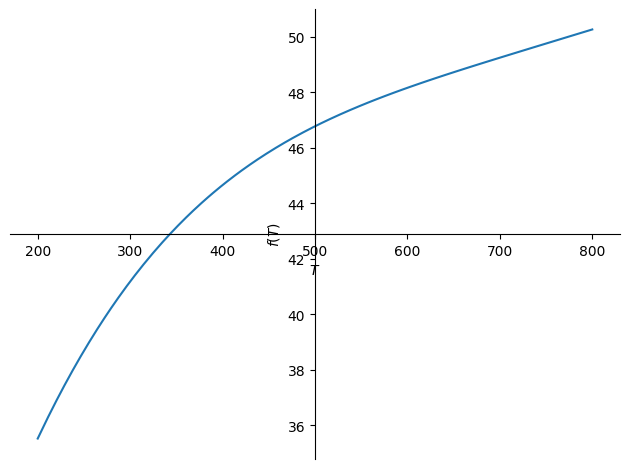

In [27]:
coeffs = (1.61033509E+00, 1.91591010E-02, -3.49254167E-05, 3.02414955E-08, -9.82610840E-12, -4.32286527E+04, -8.33410795E+00)
test_function(tf.cp_nasa7, coeffs, table_range = (200, 800), plot_range = (200, 800))

T / K	f(T)
200.0	-354238.265
300.0	-350381.913
400.0	-346076.573
500.0	-341497.537
600.0	-336747.664
700.0	-331876.986
800.0	-326902.316


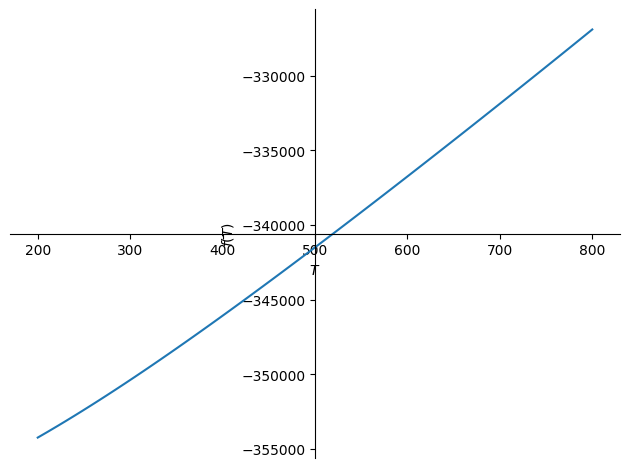

In [28]:
test_function(tf.h_nasa7, coeffs, table_range = (200, 800), plot_range = (200, 800))

T / K	f(T)
200.0	28.336
300.0	43.894
400.0	56.256
500.0	66.465
600.0	75.121
700.0	82.627
800.0	89.268


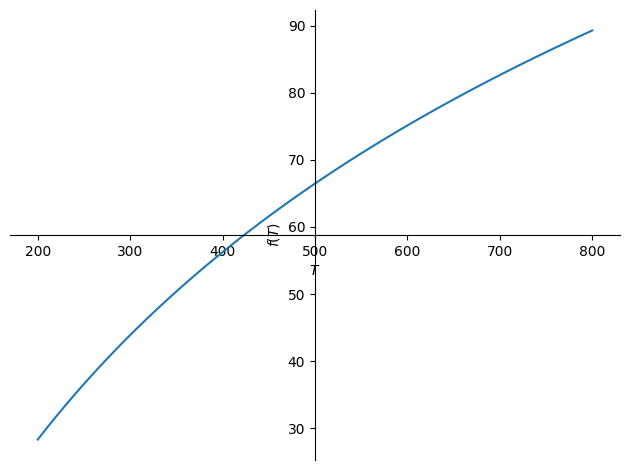

In [29]:
test_function(tf.s_nasa7, coeffs, table_range = (200, 800), plot_range = (200, 800))

T / K	f(T)
200.0	-359905.376
300.0	-363550.164
400.0	-368578.933
500.0	-374730.013
600.0	-381820.365
700.0	-389716.033
800.0	-398317.072


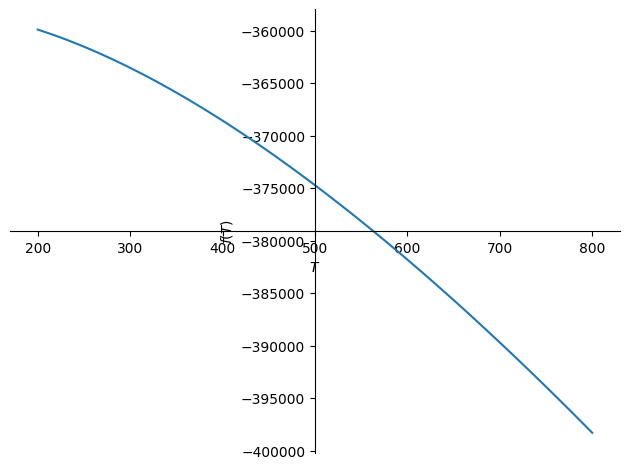

In [30]:
test_function(tf.g_nasa7, coeffs, table_range = (200, 800), plot_range = (200, 800))

### `cp_nasa9`

$$C_p = R \left( a_1T^{-2} + a_2T^{-1} + a_3 + a_4T + a_5T^2 + a_6T^3 + a_7T^4 \right)$$

### `h_nasa9`

$$H = R T \left( -a_1T^{-2} + a_2\frac{\ln{T}}{T} + a_3 + \frac{a_4}{2}T + \frac{a_5}{3}T^2 + \frac{a_6}{4}T^3 + \frac{a_7}{5}T^4 + \frac{a_8}{T} \right)$$

### `s_nasa9`

$$S = R \left( -\frac{a_1}{2}T^{-2} - a_2T^{-1} + a_3\ln{T} + a_4T + \frac{a_5}{2}T^2 + \frac{a_6}{3}T^3 + \frac{a_7}{4}T^4 + a_9 \right)$$

### `g_nasa9`

$$G = R T \left( -\frac{a_1}{2}T^{-2} + 2a_2\frac{1-ln{T}}{T} + a_3\left(1-ln{T}\right) - \frac{a_4}{2}T - \frac{a_5}{6}T^2 - \frac{a_6}{12}T^3 - \frac{a_7}{20}T^4 + \frac{a_8}{T} - a_9 \right)$$

Thermodynamics in this example is for solid ZnO from Burcat's database (Elke Goos, Alexander Burcat and Branko Ruscic. New NASA Thermodynamic Polynomials Database With Active Thermochemical Tables updates. Report ANL 05/20 TAE 960. http://burcat.technion.ac.il/dir; 23.01.2023). The low-temperature function should be valid between 298.15 K and 2248 K. The whole database entry is as follows:

```
ZnO cr                  IVTANTHERMO MSU  HF298=-350.46 kJ  REF=CODATA 84  
 1 T 6/14 ZN  1.00O   1.00    0.00    0.00    0.00 1   81.3894000    -350460.000
    298.150  2248.000 7 -2.0 -1.0  0.0  1.0  2.0  3.0  4.0  0.0         6970.000
-6.800850490D+04-4.929954250D+00 5.467477100D+00 8.531084130D-04 2.028765743D-08
-7.914355850D-12 1.188215582D-15 0.000000000D+00-4.401863240D+04-2.655707580D+01
ZnO liq                 IVTANTHERMO MSU  HF298=-350.46 kJ   REF=CODATA 84 
 1 T 6/14 ZN  1.00O   1.00    0.00    0.00    0.00 2   81.3894000    -350460.000
   2248.000  4000.000 7 -2.0 -1.0  0.0  1.0  2.0  3.0  4.0  0.0         6970.000
 1.985382066D+06-3.994344260D+03 1.138253053D+01-1.464646130D-03 3.602117470D-07
-4.688137670D-11 2.522562002D-15 0.000000000D+00-1.623966866D+04-6.725617470D+01
```

For those who are *not in the know*, D in these Fortran numbers stands for the "double precision"; otherwise, these are the common exponential decimal floating-point numbers, so D should be replaced by E for our purposes.

T / K	f(T)
300.0	41.181
400.0	44.683
500.0	46.696
600.0	48.124
700.0	49.274
800.0	50.277


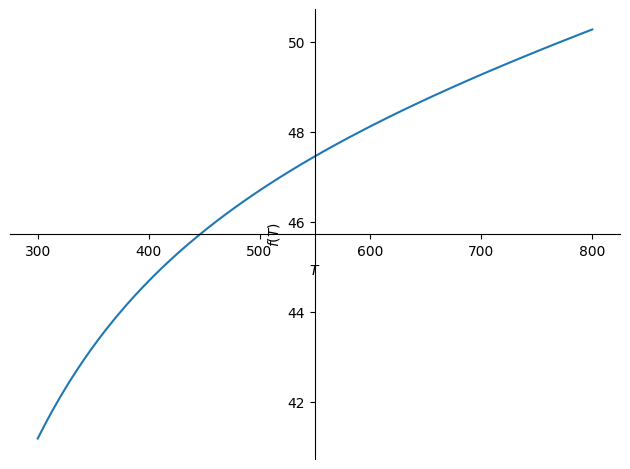

In [31]:
coeffs = (-6.800850490E+04, -4.929954250E+00, 5.467477100E+00, 8.531084130E-04, 2.028765743E-08, 
            -7.914355850E-12, 1.188215582E-15, -4.401863240E+04, -2.655707580E+01)
test_function(tf.cp_nasa9, coeffs, table_range = (300, 800), plot_range = (300, 800))

T / K	f(T)
300.0	-350381.903
400.0	-346068.926
500.0	-341492.830
600.0	-336748.648
700.0	-331877.130
800.0	-326898.649


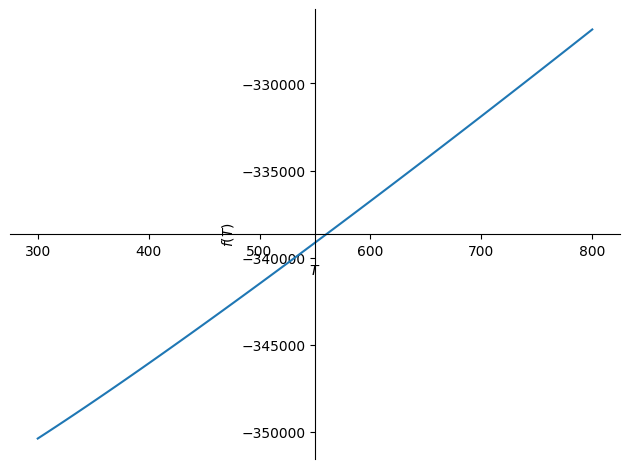

In [32]:
test_function(tf.h_nasa9, coeffs, table_range = (300, 800), plot_range = (300, 800))

T / K	f(T)
300.0	43.894
400.0	56.278
500.0	66.481
600.0	75.127
700.0	82.634
800.0	89.280


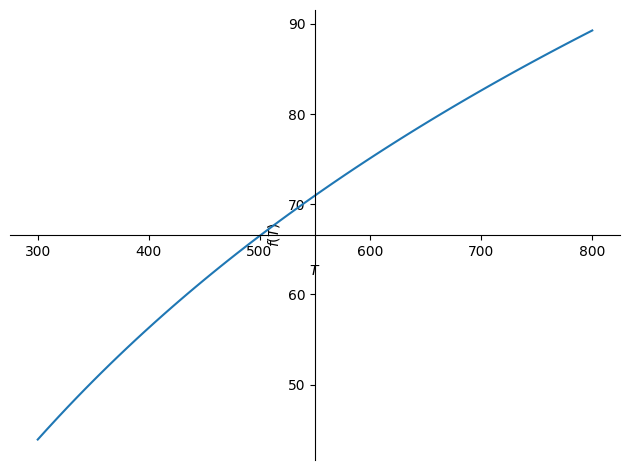

In [33]:
test_function(tf.s_nasa9, coeffs, table_range = (300, 800), plot_range = (300, 800))

T / K	f(T)
300.0	-362889.761
400.0	-367884.308
500.0	-374010.033
600.0	-381078.948
700.0	-388956.173
800.0	-397541.725


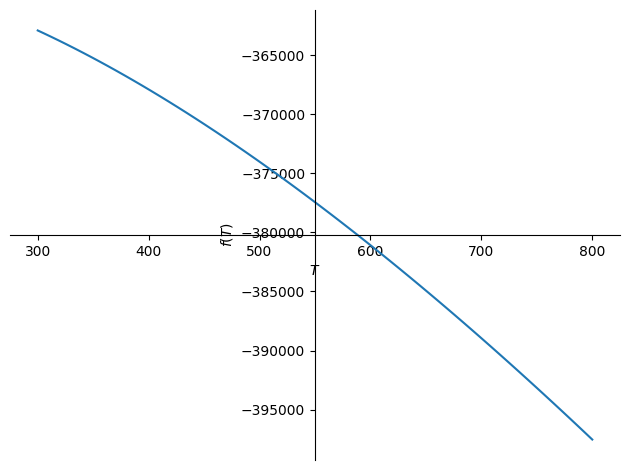

In [34]:
test_function(tf.g_nasa9, coeffs, table_range = (300, 800), plot_range = (300, 800))

## Function generators

### `poly_from_dict`

$$f(T) = \sum_{i = 1}^{n} v_i T^k_i$$

Produces a polynomial function with arbitrary (floating-point) coefficients and powers from a **{$k_i$: $v_i$}** dict. For instance, for a simple Maier-Kelley dict:

In [35]:
coeff_dict = {0: 1.316e2, 1: 6.602e-2, -2: -2.48e6}
tf.poly_from_dict(coeff_dict)

0.06602*T + 131.6 - 2480000.0/T**2

T / K	f(T)
300.0	123.850
400.0	142.508
500.0	154.690
600.0	164.323
700.0	172.753
800.0	180.541


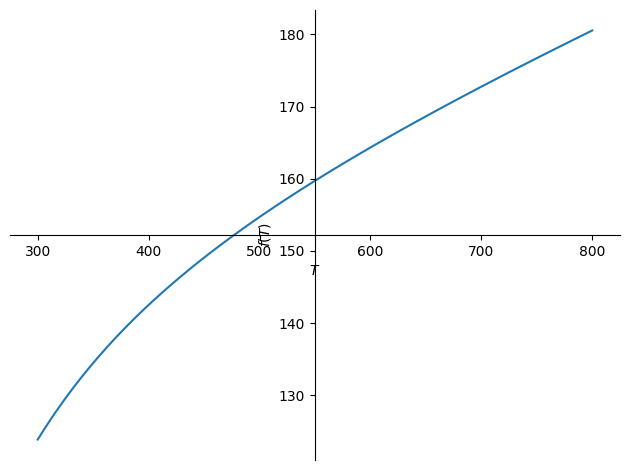

In [36]:
test_function(tf.poly_from_dict, (coeff_dict,), table_range = (300, 800), plot_range = (300, 800))

### `expr_from_dict`

$$f(T) = \sum_{i = 1}^{n} v_i k_i$$

Produces an arbitrary *symbolic* expression from a **{$k_i$: $v_i$}** dict with symbolic terms as keys and numeric multipliers as values. For example, for the same Maier-Kelley function as in the previous example:

In [37]:
coeff_dict = {'1': 1.316e2, 'T': 6.602e-2, "T**(-2)": -2.48e6}
tf.expr_from_dict(coeff_dict)

0.06602*T + 131.6 - 2480000.0/T**2

## Anomalies

# TRASH

1. gaussian + constant $\large{ H = -\frac{1}{2}a_0a_2\sqrt{2\pi}\textrm{erf}\left({\frac{\sqrt{2}(a_1-T)}{2a_2}}\right) + a_3T }$